In [93]:
# Standard Libraries
import os 
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

# Specific Libraries
import sklearn.linear_model as linear_model
import sklearn.preprocessing as preprocessing 
from sklearn import tree, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
insurance = pd.read_csv("insurance.csv")

In [3]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
#Variable summary:

#Age:       Numeric, Discrete (int), though could be continuous with better resolution
#Sex:       Categorical (object)
#BMI:       Numeric, Continuous (float)
#Children:  Numeric, Discrete (int)
#Smoker:    Categorical (object)
#Region:    Categorical (object)
#Charges:   Numeric, Continuous (float)

#Good practice: Fit your model using a subset of the data. Shouldn't
#be strictly necessary here, but it lets you test how well a model
#actually predicts new costs with new data.

#Build a random number generator:
rng = np.random.default_rng()

#Pick 60% of the data for your training set:
train_ind = rng.choice(insurance.index, round(len(insurance)*0.6))
train_set = insurance.iloc[train_ind]

#Now, the actual fitting:


#First, split up your input variables by variable type:
X_num = train_set[['age','bmi','children']].values
X_cat = train_set[['sex','smoker','region']].values

#Better name for these: (X_numeric or X continuous), (X_categorical)

#Grab your output variables:
y = train_set['charges'].values


model = linear_model.LinearRegression()
model.fit(X_num, y)

#Convert categorical values to ordinal values for fitting:

#We want categorical inputs, but continuous outputs. Logistic regression
#is the first place you go when thinking categorization, but that's for 
#categorical outputs! Here, we want a continuous output. We can use linear
#regression to predict values for each category of response, comparing 
#samples that are positive for the target response with all other samples. 
#
#For example, here, you can compare all people who are in 'southwest' to 
#people in all other regions to predict the effect that being in the
#'southwest' category has on costs. 


#Choose a variable encoder: 

#All the variable encoder is doing here is converting our categorical 
#variables to binary. We have three categories, which have two, two, and 
#four possible entries. The encoder uses one binary for each possible
#response in each category; for example, 'sex' has two columns: one that
#says yes or no to the individual having 'male' in 'sex', and one that 
#says yes or no to the individual having 'female' in 'sex'. This makes 
#the third category, where we have four possible categories, directly
#comparable to the others. 
cat_encoder = preprocessing.OneHotEncoder()


#Fit the encoder to the data:
#(Automatically figures out what possible responses are in each category)
cat_encoder.fit(X_cat)

#Transform the data to categorized data:
X_cat_2 = cat_encoder.transform(X_cat).toarray()

#Select the model:
model2 = linear_model.LinearRegression()
#Fit the model to the data:
model2.fit(X_cat_2, y)

#Display predictions for the data (note: this model uses only categorical data):
print(model2.predict(X_cat_2))

[ 7393.63001066  8692.45722351  7393.63001066  8214.68123551
  7669.71962939  7669.71962939  8210.01839883 32817.16305257
  7393.63001066  7669.71962939 32817.16305257  8754.98000495
  8210.01839883  8210.01839883  8754.98000495  8754.98000495
 33362.12465869  8214.68123551 33839.90064668  7669.71962939
  7393.63001066 33362.12465869  9232.75599294 32821.82588925
  7669.71962939 32821.82588925 32817.16305257 33362.12465869
 32276.86428314  9232.75599294  8692.45722351  7933.92878009
  8692.45722351  7393.63001066  7393.63001066 32817.16305257
  8210.01839883  8692.45722351  9232.75599294 32821.82588925
 32541.07343383  8214.68123551  8214.68123551  8210.01839883
  8210.01839883  8754.98000495  9232.75599294  8754.98000495
  7669.71962939  7393.63001066  7669.71962939  8692.45722351
  9232.75599294 33839.90064668  8754.98000495  8214.68123551
  8754.98000495  7669.71962939 32541.07343383  7393.63001066
  7669.71962939  8210.01839883  7669.71962939 32817.16305257
  8754.98000495 32000.77

In [6]:
#Build a model that uses BOTH continuous and categorical variables:

X_re = np.concatenate([X_num,X_cat_2],axis=1)

model_re = linear_model.LinearRegression()

model_re.fit(X_re, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
model_re.predict(X_re)

array([ 5.98594069e+03,  1.66025809e+04,  1.92605524e+02,  1.92597268e+03,
        1.34784499e+03,  1.20515083e+04,  1.40021297e+04,  3.28751994e+04,
        1.94044470e+03,  6.18379289e+03,  2.79178972e+04,  1.35609212e+03,
        1.78006912e+03,  1.30859880e+04,  6.49359945e+03,  1.24065937e+04,
        3.38081677e+04,  5.66831981e+01,  3.02849439e+04,  6.92614958e+03,
        1.76036776e+04,  3.56737792e+04,  1.58340522e+04,  3.82265844e+04,
        1.34624864e+04,  3.97750203e+04,  4.04995974e+04,  3.79093064e+04,
        3.70940243e+04,  1.59473072e+04,  8.57419522e+03,  5.17881003e+03,
        5.64490851e+03,  8.32313818e+03,  9.67179265e+03,  3.49418196e+04,
        2.76569448e+03,  4.24343782e+03,  1.11405435e+04,  3.32520450e+04,
        3.99651650e+04,  1.44620119e+04,  1.69741422e+04,  9.13322320e+03,
        1.03487558e+04,  1.58333499e+04,  1.73725981e+04,  1.58333499e+04,
        6.92614958e+03,  1.04598007e+04,  1.17471340e+04,  4.68168987e+03,
        1.13988833e+04,  

In [8]:
y - model_re.predict(X_re)

array([-8.33806690e+02, -5.62537464e+03,  3.01618148e+03,  2.77763266e+02,
        1.82844271e+03, -3.38031701e+03, -2.25819565e+03, -1.17766453e+04,
        1.22100930e+03,  3.46045961e+03,  5.83239461e+03,  7.46172579e+02,
       -1.44335469e+02,  1.53829310e+04, -3.22475280e+03, -5.79648401e+03,
        5.23911730e+03,  2.13979000e+03, -1.05652492e+04,  1.18786028e+04,
       -6.06525657e+03, -1.08039424e+04, -6.77532188e+03,  6.41461298e+03,
       -1.23087276e+03,  6.48009215e+03,  5.63092905e+03,  5.84403067e+03,
       -8.14355507e+03, -2.96596151e+03,  8.10708440e+00, -4.32466033e+02,
       -1.08206641e+03, -1.54717718e+03, -1.15176665e+03, -1.11345790e+04,
       -1.12613138e+03, -8.50461018e+02, -5.43137906e+03, -9.85073924e+03,
        8.20819601e+03, -6.76137502e+01, -7.54121692e+03,  7.30248596e+02,
        1.99358871e+04, -1.85149953e+03, -2.95431769e+03, -1.85149953e+03,
        1.18786028e+04,  2.44669315e+02, -5.37357667e+03, -2.66531067e+02,
       -5.96013420e+03, -

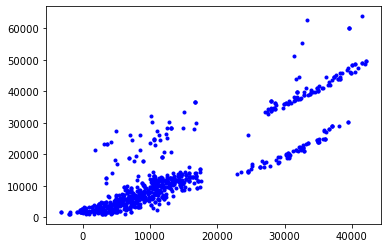

In [9]:
plt.plot(model_re.predict(X_re), y, 'b.')

In [10]:
insurance2 = pd.get_dummies(insurance)

In [11]:
insurance2

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [12]:
X = insurance2.drop('charges', axis = 1)
y = insurance2.charges

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [21]:
y_pred = model_re.fit(X_train, y_train)

In [17]:
y_pred

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = pd.Series(y_pred)

In [19]:
y_pred

0    LinearRegression(copy_X=True, fit_intercept=Tr...
dtype: object

In [23]:
predict = model_re.predict(X_test)

In [24]:
predict

array([13957.27244078, -1145.50996625,  7663.87091101,  9665.68766323,
       11534.55295059,  6836.43599227, 30219.3618931 ,  9879.51006996,
        4431.07854206, 10434.47349253,  1606.11066666,  2082.54679485,
       11213.41512737, 15826.01805544,  6315.45773768,  8909.85309066,
       29082.06315983, 14076.44135243, 11504.41057314, 12617.94317489,
       13537.20736245,  7875.83406285,  1265.34278632, 10493.47531414,
        4085.16518788,   566.7822588 ,   429.21466423, 11595.41237927,
        2085.69812187, 13369.58457818,  2916.9856922 ,  7713.57548321,
       34929.3284005 ,  1050.62167454, 15099.70229576,  2330.30135674,
        8105.50697295, 34760.66057461, 28010.89741497, 16438.22634235,
       30236.64314925, 28313.70511172, 30342.24960598, 11520.14840393,
        9982.82864362,  7739.78765419, 10207.6108266 , 12812.86817995,
       14335.30456749, 30629.9075867 ,  4885.62249575,  1933.56367473,
       11238.15896327, 16202.98861245,  6963.23045467, 33624.9679638 ,
      

In [25]:
model_re.score(X_test, y_test)

0.7406011379158968

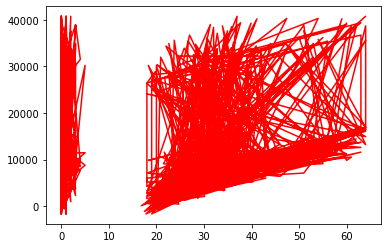

In [26]:
plt.plot(X_test, predict, color = "red")

In [30]:
tree_model = DecisionTreeRegressor()

In [31]:
tree_model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

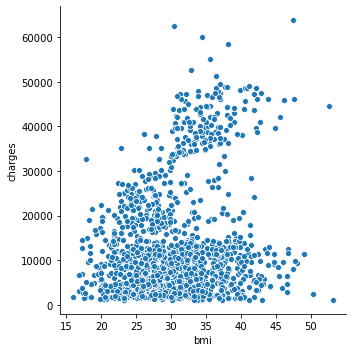

In [33]:
sns.relplot(x = "bmi", y = "charges", data = insurance2)

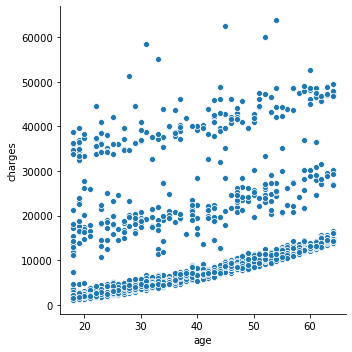

In [34]:
sns.relplot(x = "age", y = "charges", data = insurance2)

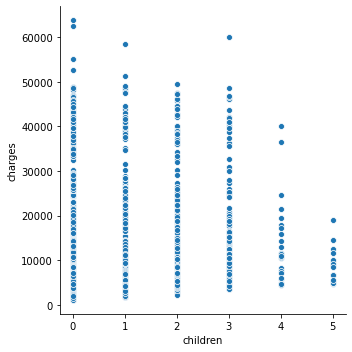

In [37]:
sns.relplot(x = "children", y = "charges", data = insurance2)

In [41]:
insurance_regions = pd.DataFrame(insurance2, columns = ["region_northeast", "region_northwest", "region_southeast", "region_southwest", "charges"])

In [46]:
insurance_regions

,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,0,0,0,1,16884.92400
1,0,0,1,0,1725.55230
2,0,0,1,0,4449.46200
3,0,1,0,0,21984.47061
4,0,1,0,0,3866.85520
...,...,...,...,...,...
1333,0,1,0,0,10600.54830
1334,1,0,0,0,2205.98080
1335,0,0,1,0,1629.83350
1336,0,0,0,1,2007.94500


In [95]:
X = insurance_regions.drop('charges', axis = 1)
y = insurance_regions.charges

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 246)

In [97]:
y_pred = model_re.fit(X_train, y_train)

In [98]:
y_pred

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
X_t = pd.get_dummies(X_train)

In [100]:
y_pred = model_re.predict(X_t)

In [101]:
y_pred

array([13824., 12288., 14336., 14336., 14336., 14336., 12800., 14336.,
       13824., 14336., 12288., 14336., 13824., 13824., 13824., 12288.,
       12800., 13824., 14336., 14336., 13824., 13824., 12800., 14336.,
       13824., 12800., 12800., 14336., 14336., 12288., 13824., 12800.,
       13824., 12800., 12288., 12800., 12288., 12800., 13824., 13824.,
       13824., 12288., 12800., 12288., 12288., 12288., 14336., 13824.,
       13824., 13824., 14336., 13824., 12800., 14336., 14336., 13824.,
       14336., 12800., 13824., 12288., 12800., 12288., 12288., 13824.,
       12800., 12800., 13824., 12800., 13824., 14336., 12288., 12800.,
       13824., 12288., 13824., 12800., 12800., 12288., 12800., 12800.,
       13824., 14336., 14336., 12800., 14336., 12800., 13824., 13824.,
       12288., 13824., 12288., 14336., 14336., 14336., 12800., 12800.,
       12288., 13824., 13824., 12800., 14336., 13824., 12288., 13824.,
       13824., 14336., 13824., 14336., 12288., 12800., 13824., 13824.,
      

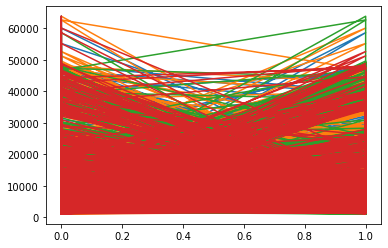

In [63]:
plt.plot(X, y)

In [64]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [66]:
get_mae(5, X_train, X_test, y_train, y_test)

9331.512976303335

In [68]:
get_mae(5, X_train, X, y_train, y)

9038.366668501283

In [71]:
def get_mae(fit_intercept,train_X, val_X, train_y, val_y):
    model = LinearRegression(fit_intercept = fit_intercept)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [72]:
get_mae(False, X_train, X_test, y_train, y_test)

9331.512976303338

In [85]:
logRegr = LogisticRegression(X_train, y_train)

In [86]:
logRegr

LogisticRegression(C=1.0, class_weight=None,
                   dual=803    38792.68560
846     9872.70100
428     3167.45585
573    31620.00106
686     7729.64575
          ...     
64     14711.74380
233    12333.82800
878     6282.23500
158    36950.25670
932    10096.97000
Name: charges, Length: 936, dtype: float64,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty=     region_northeast  region_northwest  region_southeast  region_southwest
803                 0                 0                 1                 0
846                 0                 0                 0                 1
428                 1                 0                 0                 0
573                 1                 0                 0                 0
686                 1                 0                 0                 0
..                ...               ...               